## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Тема: Основы анализа данных и машинного обучения в Python.

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   4 апреля 2021

**Дедлайн**:   21:00 18 апреля 2021

**Среда выполнения**: Jupyter Notebook (Python 3.7)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def task_1(arr):
    return np.all(arr > 0)

print(f"in [-1,1,0], out: {task_1(np.array([-1,1,0]))}\n[5,3,4]:{task_1(np.array([5,3,4]))}")
print(f"in [0,3,1], out: {task_1(np.array([0,3,1]))}")

in [-1,1,0], out: False
[5,3,4]:True
in [0,3,1], out: False


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [3]:
def task_2(arr, n):
    return np.repeat(arr, n)

print(f"in ([1,2,3], 4), out: {task_2(np.array([1,2,3]), 4)}")

in ([1,2,3], 4), out: [1 1 1 1 2 2 2 2 3 3 3 3]


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [4]:
def task_3(V, v):
    idx_a = np.cumsum(v)
    to_sum = np.split(V[:idx_a[-1]], idx_a[:-1])
    return np.array([np.sum(x) for x in to_sum])

print(f"in([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 1, 3])")
print(f", out: {task_3(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), np.array([2, 1, 3]))}")

in([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 1, 3])
, out: [ 3  3 15]


Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [5]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

#label_id и label_name были перепутаны
label_names = pd.DataFrame(columns=['label_id', 'label_name'],
                           data=[(i, e) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1.5 балла):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

Joined table:
                                                text  is_train  \
0  From: lerxst@wam.umd.edu (where's my thing)\nS...      True   
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...      True   
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...      True   
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...      True   
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      True   

              label_name  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space   

Size of Train data:11314
Size of Test data:7532


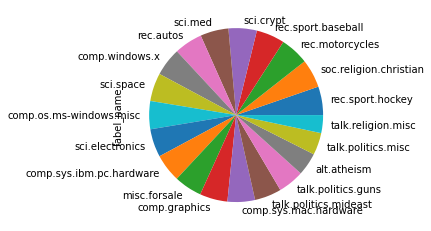

In [6]:
joined = data.merge(label_names, on='label_id', how='left')
joined.drop(['label_id'], axis=1, inplace=True)

print(f"Joined table:\n{joined.head()}", "\n")
print(f"Size of Train data:{joined.loc[joined['is_train'] == True].shape[0]}")
print(f"Size of Test data:{joined.loc[joined['is_train'] == False].shape[0]}")

joined.loc[joined['is_train'] == True]['label_name'].value_counts().plot.pie();

__Задание 5 (1.5 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [7]:
# https://stackoverflow.com/a/58104394
import re

ptrn = re.compile(r'[^a-zA-Z ]')

def preprocess(text):
    text_prep = text.lower()
    text_prep = re.sub(ptrn, ' ', text_prep)
    return text_prep.split()

def task_5():
    joined['pp_text'] = joined['text'].apply(preprocess)
    
task_5()
joined.head(7)

,text,is_train,label_name,pp_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos,"[from, lerxst, wam, umd, edu, where, s, my, th..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware,"[from, guykuo, carson, u, washington, edu, guy..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware,"[from, twillis, ec, ecn, purdue, edu, thomas, ..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics,"[from, jgreen, amber, joe, green, subject, re,..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space,"[from, jcm, head, cfa, harvard, edu, jonathan,..."
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,True,talk.politics.guns,"[from, dfo, vttoulu, tko, vtt, fi, foxvog, dou..."
6,From: bmdelane@quads.uchicago.edu (brian manni...,True,sci.med,"[from, bmdelane, quads, uchicago, edu, brian, ..."


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости.

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и постройте гистограмму частот.

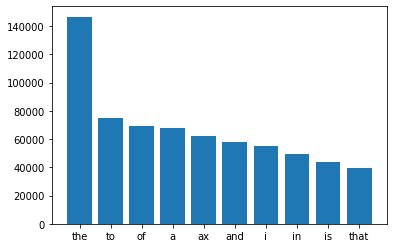

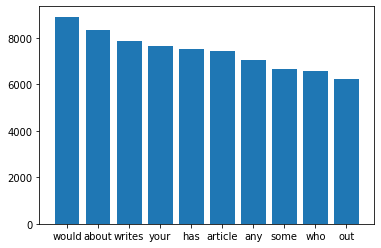

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

vocabulary = Counter()
train_df = joined.loc[joined['is_train'] == True]

def task_6():
    wrd_dict = Counter()
    train_df['pp_text'].apply(wrd_dict.update)
    lists = sorted(wrd_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    x, y = zip(*lists)
    plt.bar(x, y)
    plt.show()
    return wrd_dict
    
def wrd_filt(wrd_list):
    return list( filter(lambda x: x in vocabulary.keys(), wrd_list) )

vocabulary = task_6()
vocabulary = dict( filter (lambda x:
                           x[1] <= 9000 and
                           x[1] >= 3 and
                           len(x[0]) <= 20 and
                           len(x[0]) >= 3 and
                           x[0] != len(x[0]) * x[0][0],
                           vocabulary.items()
                          )
                 )
#1676: SettingWithCopyWarning даже через loc, в чем моя ошибка, или прелести интерпретатора?
train_df.loc[:, 'pp_text'] = train_df['pp_text'].apply(wrd_filt)
vocabulary = task_6()

__Задание 7 (2 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

test_df = joined.loc[joined['is_train'] == False]

def task_7():
    vectorizer = CountVectorizer(vocabulary=vocabulary.keys())
    X = vectorizer.fit(joined['text'])
    cv_train = vectorizer.transform(train_df['text'])
    cv_test = vectorizer.transform(test_df['text'])
    return cv_train, cv_test

X_train, X_test = task_7()

__Задание 8 (2 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

y_train, y_test = train_df['label_name'], test_df['label_name']

model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)
predict_n = model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, predict_n)}")
print(f"Test f1-score macro: {f1_score(y_test, predict_n, average='macro')}")
print(f"Test f1-score micro: {f1_score(y_test, predict_n, average='micro')}")

Test Accuracy: 0.7877057886351566
Test f1-score macro: 0.7810664687924846
Test f1-score micro: 0.7877057886351566


In [11]:
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='multinomial'), cv=3,
                     param_grid={"C": [0.5, 1.0, 10.0]},
                     scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best accuracy:{grid_search.best_score_} with {grid_search.best_params_} adn cross-valid-n parameter=3")

Best accuracy:0.8700726854558504 with {'C': 1.0} adn cross-valid-n parameter=3


__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

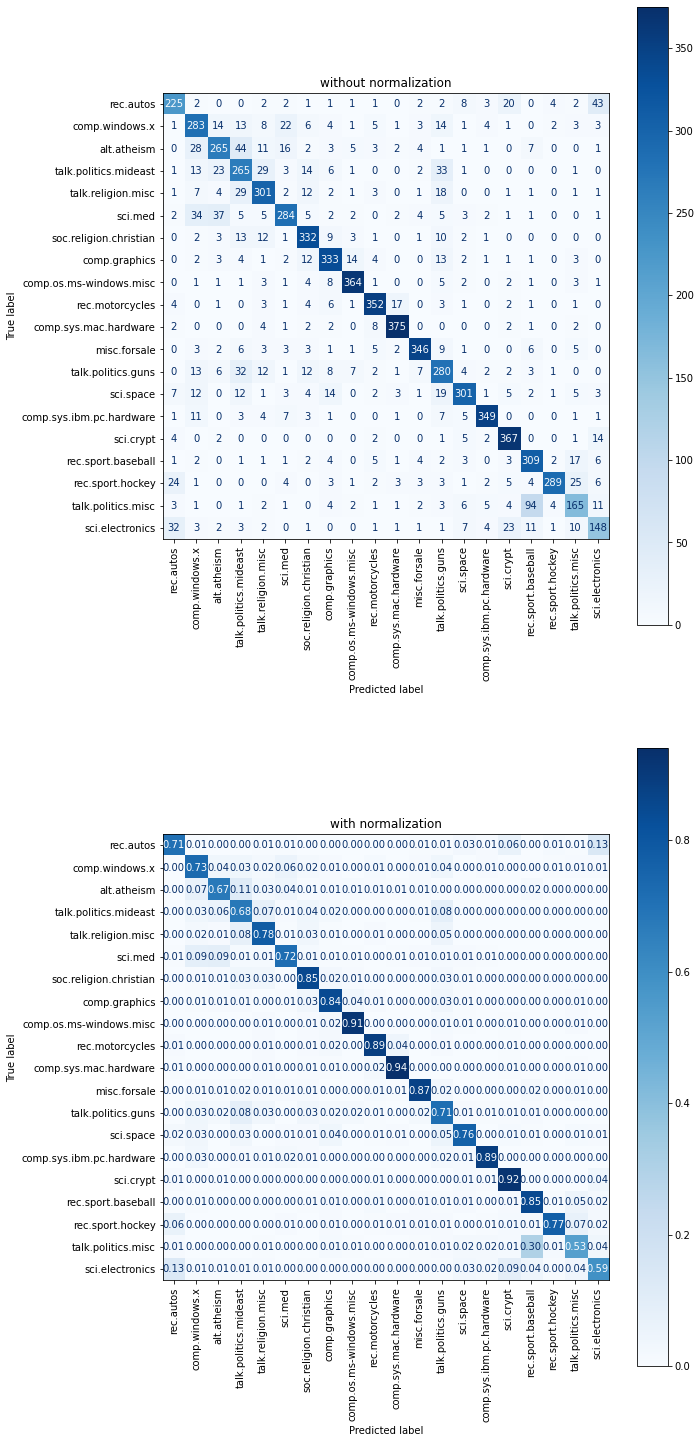

In [12]:
from sklearn.metrics import plot_confusion_matrix

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
fig = plt.figure(figsize=(10, 25))
ax_0 = plt.subplot(2, 1, 1)
ax_0.set_title("without normalization")
displ_0 = plot_confusion_matrix(model, X_test, y_test, display_labels=y_test.unique(),
                               cmap=plt.cm.Blues,
                               ax = ax_0
                              )

ax_1 = plt.subplot(2, 1, 2)
ax_1.set_title("with normalization")
displ_1 = plot_confusion_matrix(model, X_test, y_test, display_labels=y_test.unique(),
                               cmap=plt.cm.Blues, normalize='true', values_format='.2f',
                               ax = ax_1
                              )
plt.setp(ax_0.get_xticklabels(), ha="center", rotation=90)
plt.setp(ax_1.get_xticklabels(), ha="center", rotation=90)
plt.show();

__Вывод:__  
Чаще всего ложно предсказываются политика и электроника. Первое путается с темой бейсбола, второе - с автомобилями

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [13]:
from xgboost import XGBClassifier

def task_10():
    pass

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/andreytretyakov/.local/share/virtualenvs/PythonMIPTCourse-t8wcJ3oe/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/andreytretyakov/.local/share/virtualenvs/PythonMIPTCourse-t8wcJ3oe/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


__Задание 11 (2.5 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [ ]:
def task_11():
    pass

__Задание 12 (2.5 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать? Попробуйте варьировать значение T и удалять сообщества из 1 слова.

In [ ]:
from networkx import Graph
from networkx.algorithms import community

def task_12():
    # community.greedy_modularity_communities(...)
    pass